# GEOTRACES 
found online from https://geotraces.webodv.awi.de/IDP2021_v2%3EGEOTRACES_IDP2021_Seawater_Discrete_Sample_Data_v2/service/DataExploration <br> 
more recent data (2018-2020) is kindly provided by Racquelle Mangahas and Jay Cullen.

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from cartopy import crs, feature
import numpy as np
import cmocean as cm
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import matplotlib.dates as mdates
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from datetime import timedelta

import gsw

In [2]:
grid = xr.open_dataset('/ocean/rbeutel/MOAD/analysis-becca/LiveOcean/grid.nc')
#line p data from 2012-2020
lp = pd.read_csv("/ocean/rbeutel/MOAD/analysis-becca/LiveOcean/tracers/GEOTRACES/TM_LineP_2012-2020_RobynTaves.csv").drop([0], axis=0).reset_index().drop(['index'], axis=1)
# data from geotraces, line p data dropped so we done get duplicates
geo = xr.open_dataset("/ocean/rbeutel/MOAD/analysis-becca/LiveOcean/tracers/GEOTRACES/data_from_GEOTRACES_IDP2021_Seawater_Discrete_Sample_Data_v2.nc")


In [3]:
lp

,Cruise ID,Season,Month,Station ID,Event ID,Start Date (UTC),Start Time (UTC),Start Latitude,Start Longitude,Sample ID,...,Flag::Ni_D_CONC_BOTTLE,Cu_D_CONC_BOTTLE,1SD::Cu_D_CONC_BOTTLE,Flag::Cu_D_CONC_BOTTLE,Zn_D_CONC_BOTTLE,1SD::Zn_D_CONC_BOTTLE,Flag::Zn_D_CONC_BOTTLE,Cd_D_CONC_BOTTLE,1SD::Cd_D_CONC_BOTTLE,Flag::Cd_D_CONC_BOTTLE
0,2012-01,Winter,february_2012,P26,48,15-02-2012,17:30,50,-145,420,...,1,1.59,0.01,1,0.78,0.01,1,0.44,0.01,1
1,2012-01,Winter,february_2012,P26,48,15-02-2012,17:30,50,-145,419,...,1,1.57,0.01,1,0.77,0.01,1,0.448,0.005,1
2,2012-01,Winter,february_2012,P26,48,15-02-2012,17:30,50,-145,418,...,1,1.83,0.04,1,0.75,0.02,1,0.44,0.02,1
3,2012-01,Winter,february_2012,P26,45,15-02-2012,15:45,50,-145,393,...,1,1.808,0.009,1,1.12,0.03,1,0.451,0.004,1
4,2012-01,Winter,february_2012,P26,45,15-02-2012,15:45,50,-145,391,...,1,1.74,0.01,1,2.81,0.02,1,0.46,0.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,2020-008,Summer,august_2020,P4,87,24-08-2020,7:49,48.65,-126.67,449,...,1,1.52,0.02,1,3.42,0.02,1,0.58,0.01,1
553,2020-008,Summer,august_2020,P4,87,24-08-2020,7:49,48.65,-126.67,448,...,1,1.20,0.01,1,2.082,0.009,1,0.563,0.005,1
554,2020-008,Summer,august_2020,P4,87,24-08-2020,7:49,48.65,-126.67,147,...,1,1.13,0.01,1,2.77,0.02,1,0.581,0.004,1
555,2020-008,Summer,august_2020,P4,87,24-08-2020,7:49,48.65,-126.67,446,...,1,1.27,0.01,1,4.36,0.03,1,0.646,0.005,1


In [4]:
geo

<xarray.Dataset>
Dimensions:                       (N_SAMPLES: 290, N_STATIONS: 52)
Dimensions without coordinates: N_SAMPLES, N_STATIONS
Data variables:
    cruise_id                     (N_STATIONS) |S6 ...
    station_id                    (N_STATIONS) |S4 ...
    station_type                  (N_STATIONS) |S1 ...
    longitude                     (N_STATIONS) float32 ...
    latitude                      (N_STATIONS) float32 ...
    Bot__Depth                    (N_STATIONS) float32 ...
    Operator_s_Cruise_Name        (N_STATIONS) |S7 ...
    Ship_Name                     (N_STATIONS) |S13 ...
    Period                        (N_STATIONS) |S23 ...
    Chief_Scientist               (N_STATIONS) |S31 ...
    GEOTRACES_Scientist           (N_STATIONS) |S46 ...
    Cruise_Aliases                (N_STATIONS) |S6 ...
    Cruise_Information_Link       (N_STATIONS) |S75 ...
    BODC_Cruise_Number            (N_STATIONS) float64 ...
    date_time                     (N_STATIONS) datetime64[ns] ...
    CTDPRS_T_VALUE_SENSOR         (N_STATIONS, N_SAMPLES) float32 ...
    CTDPRS_T_VALUE_SENSOR_qc      (N_STATIONS, N_SAMPLES) float32 ...
    DEPTH                         (N_STATIONS, N_SAMPLES) float32 ...
    DEPTH_qc                      (N_STATIONS, N_SAMPLES) float32 ...
    Rosette_Bottle_Number         (N_STATIONS, N_SAMPLES) float64 ...
    Rosette_Bottle_Number_qc      (N_STATIONS, N_SAMPLES) float32 ...
    GEOTRACES_Sample_ID           (N_STATIONS, N_SAMPLES) |S6 ...
    GEOTRACES_Sample_ID_qc        (N_STATIONS, N_SAMPLES) float32 ...
    Bottle_Flag                   (N_STATIONS, N_SAMPLES) |S23 ...
    Bottle_Flag_qc                (N_STATIONS, N_SAMPLES) float32 ...
    Cast_Identifier               (N_STATIONS, N_SAMPLES) |S8 ...
    Cast_Identifier_qc            (N_STATIONS, N_SAMPLES) float32 ...
    Sampling_Device               (N_STATIONS, N_SAMPLES) |S5 ...
    Sampling_Device_qc            (N_STATIONS, N_SAMPLES) float32 ...
    BODC_Bottle_Number            (N_STATIONS, N_SAMPLES) float64 ...
    BODC_Bottle_Number_qc         (N_STATIONS, N_SAMPLES) float32 ...
    BODC_Event_Number             (N_STATIONS, N_SAMPLES) float64 ...
    BODC_Event_Number_qc          (N_STATIONS, N_SAMPLES) float32 ...
    CTDTMP_T_VALUE_SENSOR         (N_STATIONS, N_SAMPLES) float32 ...
    CTDTMP_T_VALUE_SENSOR_qc      (N_STATIONS, N_SAMPLES) float32 ...
    CTDSAL_D_CONC_SENSOR          (N_STATIONS, N_SAMPLES) float32 ...
    CTDSAL_D_CONC_SENSOR_qc       (N_STATIONS, N_SAMPLES) float32 ...
    SALINITY_D_CONC_BOTTLE        (N_STATIONS, N_SAMPLES) float32 ...
    SALINITY_D_CONC_BOTTLE_qc     (N_STATIONS, N_SAMPLES) float32 ...
    SALINITY_D_CONC_PUMP          (N_STATIONS, N_SAMPLES) float32 ...
    SALINITY_D_CONC_PUMP_qc       (N_STATIONS, N_SAMPLES) float32 ...
    SALINITY_D_CONC_FISH          (N_STATIONS, N_SAMPLES) float32 ...
    SALINITY_D_CONC_FISH_qc       (N_STATIONS, N_SAMPLES) float32 ...
    SALINITY_D_CONC_UWAY          (N_STATIONS, N_SAMPLES) float32 ...
    SALINITY_D_CONC_UWAY_qc       (N_STATIONS, N_SAMPLES) float32 ...
    OXYGEN_D_CONC_BOTTLE          (N_STATIONS, N_SAMPLES) float32 ...
    OXYGEN_D_CONC_BOTTLE_qc       (N_STATIONS, N_SAMPLES) float32 ...
    CTDOXY_D_CONC_SENSOR          (N_STATIONS, N_SAMPLES) float32 ...
    CTDOXY_D_CONC_SENSOR_qc       (N_STATIONS, N_SAMPLES) float32 ...
    PHOSPHATE_D_CONC_BOTTLE       (N_STATIONS, N_SAMPLES) float32 ...
    PHOSPHATE_D_CONC_BOTTLE_qc    (N_STATIONS, N_SAMPLES) float32 ...
    SILICATE_D_CONC_BOTTLE        (N_STATIONS, N_SAMPLES) float32 ...
    SILICATE_D_CONC_BOTTLE_qc     (N_STATIONS, N_SAMPLES) float32 ...
    NITRATE_D_CONC_BOTTLE         (N_STATIONS, N_SAMPLES) float32 ...
    NITRATE_D_CONC_BOTTLE_qc      (N_STATIONS, N_SAMPLES) float32 ...
    NITRITE_D_CONC_BOTTLE         (N_STATIONS, N_SAMPLES) float32 ...
    NITRITE_D_CONC_BOTTLE_qc      (N_STATIONS, N_SAMPLES) float32 ...
    NO2_NO3_D_CONC_BOTTLE         (N_STATIONS, N_SAMPLES) float3

In [5]:
lp.columns

Index(['Cruise ID', 'Season', 'Month', 'Station ID', 'Event ID',
       'Start Date (UTC)', 'Start Time (UTC)', 'Start Latitude',
       'Start Longitude', 'Sample ID', 'Sigmat', 'Density', 'Depth',
       'Mn_D_CONC_BOTTLE', '1SD::Mn_D_CONC_BOTTLE', 'Flag::Mn_D_CONC_BOTTLE',
       'Fe_D_CONC_BOTTLE', '1SD::Fe_D_CONC_BOTTLE', 'Flag::Fe_D_CONC_BOTTLE',
       'Co_D_CONC_BOTTLE', '1SD::Co_D_CONC_BOTTLE', 'Flag::Co_D_CONC_BOTTLE',
       'Ni_D_CONC_BOTTLE', '1SD::Ni_D_CONC_BOTTLE', 'Flag::Ni_D_CONC_BOTTLE',
       'Cu_D_CONC_BOTTLE', '1SD::Cu_D_CONC_BOTTLE', 'Flag::Cu_D_CONC_BOTTLE',
       'Zn_D_CONC_BOTTLE', '1SD::Zn_D_CONC_BOTTLE', 'Flag::Zn_D_CONC_BOTTLE',
       'Cd_D_CONC_BOTTLE', '1SD::Cd_D_CONC_BOTTLE', 'Flag::Cd_D_CONC_BOTTLE'],
      dtype='object')

In [6]:
lp['date']=pd.to_datetime(lp['Start Date (UTC)'])
lp['Start Latitude']=pd.to_numeric(lp['Start Latitude'])
lp['Start Longitude']=pd.to_numeric(lp['Start Longitude'])

/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15-02-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '17-02-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '13-02-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:10

In [7]:
# geotraces stations with temperature and salinity data: 
st = []
for i in geo.N_STATIONS:
    if np.max(geo.CTDTMP_T_VALUE_SENSOR[i,:]).values > 0 :
        if np.max(geo.CTDSAL_D_CONC_SENSOR[i,:]).values > 0 :
            # print(i.values)
            st = np.append(st,int(i.values))
# everything except the line-p data which we already dropped!

In [8]:
# date range of geotraces data
print(np.min(geo.date_time).values,'-',np.max(geo.date_time).values)

2013-08-23T04:17:40.000000520 - 2018-10-14T04:01:58.999763584


In [18]:
geo

<xarray.Dataset>
Dimensions:                       (N_SAMPLES: 290, N_STATIONS: 52)
Dimensions without coordinates: N_SAMPLES, N_STATIONS
Data variables:
    cruise_id                     (N_STATIONS) |S6 b'GP02' b'GP02' ... b'GPpr07'
    station_id                    (N_STATIONS) |S4 b'(7)' b'(8)' ... b'P4'
    station_type                  (N_STATIONS) |S1 b'B' b'B' b'B' ... b'B' b'B'
    longitude                     (N_STATIONS) float32 200.0 205.0 ... 233.3
    latitude                      (N_STATIONS) float32 47.0 47.0 ... 50.0 48.65
    Bot__Depth                    (N_STATIONS) float32 5.166e+03 ... 4.023e+03
    Operator_s_Cruise_Name        (N_STATIONS) |S7 b'KH17-03' ... b'2014-19'
    Ship_Name                     (N_STATIONS) |S13 b'Hakuho Maru' ... b'John...
    Period                        (N_STATIONS) |S23 b'23/06/2017 - 09/08/2017...
    Chief_Scientist               (N_STATIONS) |S31 b'Obata Hajime' ... b'Rob...
    GEOTRACES_Scientist           (N_STATIONS) |S46 b'Obata Hajime' ... b'Ros...
    Cruise_Aliases                (N_STATIONS) |S6 b'' b'' ... b'Line P'
    Cruise_Information_Link       (N_STATIONS) |S75 b'https://www.bodc.ac.uk/...
    BODC_Cruise_Number            (N_STATIONS) float64 1.635e+04 ... 1.611e+04
    date_time                     (N_STATIONS) datetime64[ns] 2017-07-08T15:0...
    CTDPRS_T_VALUE_SENSOR         (N_STATIONS, N_SAMPLES) float32 9.887 ... nan
    CTDPRS_T_VALUE_SENSOR_qc      (N_STATIONS, N_SAMPLES) float32 48.0 ... nan
    DEPTH                         (N_STATIONS, N_SAMPLES) float32 9.8 ... nan
    DEPTH_qc                      (N_STATIONS, N_SAMPLES) float32 48.0 ... nan
    Rosette_Bottle_Number         (N_STATIONS, N_SAMPLES) float64 14.0 ... nan
    Rosette_Bottle_Number_qc      (N_STATIONS, N_SAMPLES) float32 48.0 ... nan
    GEOTRACES_Sample_ID           (N_STATIONS, N_SAMPLES) |S6 b'CL0866' ... b''
    GEOTRACES_Sample_ID_qc        (N_STATIONS, N_SAMPLES) float32 48.0 ... nan
    Bottle_Flag                   (N_STATIONS, N_SAMPLES) |S23 b'No problem r...
    Bottle_Flag_qc                (N_STATIONS, N_SAMPLES) float32 48.0 ... nan
    Cast_Identifier               (N_STATIONS, N_SAMPLES) |S8 b'CL7-5' ... b''
    Cast_Identifier_qc            (N_STATIONS, N_SAMPLES) float32 48.0 ... nan
    Sampling_Device               (N_STATIONS, N_SAMPLES) |S5 b'UCCTD' ... b''
    Sampling_Device_qc            (N_STATIONS, N_SAMPLES) float32 48.0 ... nan
    BODC_Bottle_Number            (N_STATIONS, N_SAMPLES) float64 2.005e+06 ....
    BODC_Bottle_Number_qc         (N_STATIONS, N_SAMPLES) float32 48.0 ... nan
    BODC_Event_Number             (N_STATIONS, N_SAMPLES) float64 2.069e+06 ....
    BODC_Event_Number_qc          (N_STATIONS, N_SAMPLES) float32 48.0 ... nan
    CTDTMP_T_VALUE_SENSOR         (N_STATIONS, N_SAMPLES) float32 9.911 ... nan
    CTDTMP_T_VALUE_SENSOR_qc      (N_STATIONS, N_SAMPLES) float32 49.0 ... nan
    CTDSAL_D_CONC_SENSOR          (N_STATIONS, N_SAMPLES) float32 32.53 ... nan
    CTDSAL_D_CONC_SENSOR_qc       (N_STATIONS, N_SAMPLES) float32 49.0 ... nan
    SALINITY_D_CONC_BOTTLE        (N_STATIONS, N_SAMPLES) float32 nan ... nan
    SALINITY_D_CONC_BOTTLE_qc     (N_STATIONS, N_SAMPLES) float32 nan ... nan
    SALINITY_D_CONC_PUMP          (N_STATIONS, N_SAMPLES) float32 nan ... nan
    SALINITY_D_CONC_PUMP_qc       (N_STATIONS, N_SAMPLES) float32 nan ... nan
    SALINITY_D_CONC_FISH          (N_STATIONS, N_SAMPLES) float32 nan ... nan
    SALINITY_D_CONC_FISH_qc       (N_STATIONS, N_SAMPLES) float32 nan ... nan
    SALINITY_D_CONC_UWAY          (N_STATIONS, N_SAMPLES) float32 nan ... nan
    SALINITY_D_CONC_UWAY_qc       (N_STATIONS, N_SAMPLES) float32 nan ... nan
    OXYGEN_D_CONC_BOTTLE          (N_STATIONS, N_SAMPLES) float32 nan ... nan
    OXYGEN_D_CONC_BOTTLE_qc       (N_STATIONS, N_SAMPLES) float32 nan ... nan
    CTDOXY_D_CONC_SENSOR          (N_STATIONS, N_SAMPLES) float32 289.0 ... nan
    CTDOXY_D_CONC_SENSOR_qc       (N_STATIONS, N_SAM

In [21]:
# ok lets see which stations have the other variables
sa = []
ct = []
ox = []
phos = []
sil = []
nitra = []
nitri = []
no23 = []
Al = [] 
Ba = [] 
Cd = [] 
Co = [] 
Cu = [] 
Fe = [] 
Ga = [] 
Mn = [] 
Ni = [] 
Pb = [] 

for i in geo.N_STATIONS:
    if np.max(geo.CTDTMP_T_VALUE_SENSOR[i,:]).values > 0:
            ct = np.append(ct,int(i.values))
    if np.max(geo.SALINITY_D_CONC_BOTTLE[i,:]).values > 0 or np.max(geo.CTDSAL_D_CONC_SENSOR[i,:]).values > 0:
            sa = np.append(sa,int(i.values))
    if np.max(geo.OXYGEN_D_CONC_BOTTLE[i,:]).values > 0 or np.max(geo.CTDOXY_D_CONC_SENSOR[i,:]).values > 0:
            ox = np.append(ox,int(i.values))
    if np.max(geo.PHOSPHATE_D_CONC_BOTTLE[i,:]).values > 0 or np.max(geo.PHOSPHATE_D_CONC_PUMP[i,:]).values > 0 :
            phos = np.append(phos,int(i.values))
    if np.max(geo.SILICATE_D_CONC_BOTTLE[i,:]).values > 0 or np.max(geo.SILICATE_D_CONC_PUMP[i,:]).values > 0 :
            sil = np.append(sil,int(i.values))
    if np.max(geo.NITRATE_D_CONC_BOTTLE[i,:]).values > 0 or np.max(geo.NITRATE_D_CONC_PUMP[i,:]).values > 0 :
            nitra = np.append(nitra,int(i.values))
    if np.max(geo.NITRITE_D_CONC_BOTTLE[i,:]).values > 0 or np.max(geo.NITRITE_D_CONC_PUMP[i,:]).values > 0 :
            nitri = np.append(nitri,int(i.values))
    if np.max(geo.Al_D_CONC_BOTTLE[i,:]).values > 0:
            Al = np.append(Al,int(i.values))
    if np.max(geo.Ba_D_CONC_BOTTLE[i,:]).values > 0:
            Ba = np.append(Ba,int(i.values))
    if np.max(geo.Cd_D_CONC_BOTTLE[i,:]).values > 0:
            Cd = np.append(Cd,int(i.values))
    if np.max(geo.Co_D_CONC_BOTTLE[i,:]).values > 0:
            Co = np.append(Co,int(i.values))
    if np.max(geo.Cu_D_CONC_BOTTLE[i,:]).values > 0:
            Cu = np.append(Cu,int(i.values))
    if np.max(geo.Fe_D_CONC_BOTTLE[i,:]).values > 0:
            Fe = np.append(Fe,int(i.values))
    if np.max(geo.Ga_D_CONC_BOTTLE[i,:]).values > 0:
            Ga = np.append(Ga,int(i.values))
    if np.max(geo.Mn_D_CONC_BOTTLE[i,:]).values > 0:
            Mn = np.append(Mn,int(i.values))
    if np.max(geo.Ni_D_CONC_BOTTLE[i,:]).values > 0:
            Ni = np.append(Ni,int(i.values))
    if np.max(geo.Pb_D_CONC_BOTTLE[i,:]).values > 0:
            Pb = np.append(Pb,int(i.values))


print('temperature:',len(ct))
print('salinity:',len(sa))
print('oxygen:',len(ox))
print('phosphate:',len(phos))
print('nitrate:',len(nitra))
print('nitrite:',len(nitri))
print('silicate:',len(sil))
print('Al:', len(Al))
print('Ba:', len(Ba))
print('Cd:', len(Cd))
print('Co:', len(Co))
print('Cu:', len(Cu))
print('Fe:', len(Fe))
print('Ga:', len(Ga))
print('Mn:', len(Mn))
print('Ni:', len(Ni))
print('Pb', len(Pb))

temperature: 45
salinity: 45
oxygen: 45
phosphate: 39
nitrate: 24
nitrite: 14
silicate: 39
Al: 6
Ba: 13
Cd: 14
Co: 13
Cu: 21
Fe: 21
Ga: 13
Mn: 6
Ni: 6
Pb 6


/home/rbeutel/anaconda3/envs/Ariane/lib/python3.9/site-packages/shapefile.py:391: UserWarning: Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.
  warnings.warn('Shapefile shape has invalid polygon: no exterior rings found (must have clockwise orientation); interpreting holes as exteriors.')


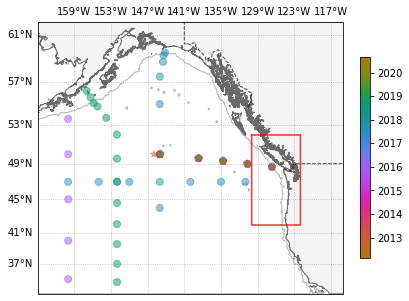

In [9]:
xlim, ylim = [-165, -115], [33, 62]
fig, ax = plt.subplots(figsize=(6, 5), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

#Depth
X, Y = grid.lon_rho, grid.lat_rho

# Draw coastline
ax.add_feature(feature.GSHHSFeature('high', edgecolor='dimgray', facecolor='whitesmoke', zorder=2))
# Draw 1000 m isobar
ax.add_feature(feature.NaturalEarthFeature(name='bathymetry_J_1000', scale='10m', category='physical', edgecolor='dimgray', facecolor='white', alpha=0.5))

# add canada USA border
ax.add_feature(feature.BORDERS, linestyle='dashed', edgecolor='k', alpha=0.7, zorder=3)

# Draw model box
ax.plot(grid['lon_rho'][ :,  0], grid['lat_rho'][ :,  0], 'r', alpha=0.8, zorder=3, transform=crs.PlateCarree())
ax.plot(grid['lon_rho'][ :, -1], grid['lat_rho'][ :, -1], 'r', alpha=0.8, zorder=3, transform=crs.PlateCarree())
ax.plot(grid['lon_rho'][ 0,  :], grid['lat_rho'][ 0,  :], 'r', alpha=0.8, zorder=3, transform=crs.PlateCarree())
ax.plot(grid['lon_rho'][-1,  :], grid['lat_rho'][-1,  :], 'r', alpha=0.8, zorder=3, transform=crs.PlateCarree())

# color based on year
lp_stations = lp.drop(lp.columns[9:-2],axis=1).groupby(['Station ID', 'date'],as_index=False).first()
date2num = mdates.date2num(lp_stations['date'].values)  # Convert datetime objects to Matplotlib's internal format
date2num2 = mdates.date2num(geo.date_time)  # Convert datetime objects to Matplotlib's internal format
colormap = cm.cm.phase
normalize = Normalize(min(date2num), max(date2num))

sc = ax.scatter([geo.longitude[int(i)]-360 for i in st],
                [geo.latitude[int(i)] for i in st],
                c=[date2num2[int(i)] for i in st],
                s=50,
                cmap=colormap,
                norm=normalize,
                transform=crs.PlateCarree(),
                zorder=4,
                alpha=0.5)

sc = ax.scatter(lp_stations['Start Longitude'].values-360,
                lp_stations['Start Latitude'].values,
                c=date2num,
                s=50,
                cmap=colormap,
                norm=normalize,
                transform=crs.PlateCarree(),
                marker='*',
                zorder=4,
                alpha=0.5)

cbar = fig.colorbar(ScalarMappable(norm=normalize, cmap=colormap), ax=ax, fraction=0.03)
cbar.ax.yaxis.set_major_locator(mdates.AutoDateLocator())
cbar.ax.yaxis.set_major_formatter(mdates.DateFormatter('%Y'))


# Add gridlines
xlocs = np.arange(np.floor(xlim[0]), np.ceil(xlim[1])+1,6)
ylocs = np.arange(np.floor(ylim[0]), np.ceil(ylim[1])+1,4)
gl = ax.gridlines(linestyle=":", color='k', alpha=0.3, draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.right_labels = False
gl.bottom_labels = False
# plt.savefig("GEOTRACESmap.png")

In [10]:
# ok lets see which stations have the other variables
ox = []
phos = []
sil = []
nitra = []
nitri = []
no23 = []
Al = [] 
Ba = [] 
Cd = [] 
Co = [] 
Cu = [] 
Fe = [] 
Ga = [] 
Mn = [] 
Ni = [] 
Pb = [] 

for i in geo.N_STATIONS:
    if np.max(geo.OXYGEN_D_CONC_BOTTLE[i,:]).values > 0 or np.max(geo.CTDOXY_D_CONC_SENSOR[i,:]).values > 0:
            ox = np.append(ox,int(i.values))
    if np.max(geo.PHOSPHATE_D_CONC_BOTTLE[i,:]).values > 0 or np.max(geo.PHOSPHATE_D_CONC_PUMP[i,:]).values > 0 :
            phos = np.append(phos,int(i.values))
    if np.max(geo.SILICATE_D_CONC_BOTTLE[i,:]).values > 0 or np.max(geo.SILICATE_D_CONC_PUMP[i,:]).values > 0 :
            sil = np.append(sil,int(i.values))
    if np.max(geo.NITRATE_D_CONC_BOTTLE[i,:]).values > 0 or np.max(geo.NITRATE_D_CONC_PUMP[i,:]).values > 0 :
            nitra = np.append(nitra,int(i.values))
    if np.max(geo.NITRITE_D_CONC_BOTTLE[i,:]).values > 0 or np.max(geo.NITRITE_D_CONC_PUMP[i,:]).values > 0 :
            nitri = np.append(nitri,int(i.values))
    if np.max(geo.Al_D_CONC_BOTTLE[i,:]).values > 0:
            Al = np.append(Al,int(i.values))
    if np.max(geo.Ba_D_CONC_BOTTLE[i,:]).values > 0:
            Ba = np.append(Ba,int(i.values))
    if np.max(geo.Cd_D_CONC_BOTTLE[i,:]).values > 0:
            Cd = np.append(Cd,int(i.values))
    if np.max(geo.Co_D_CONC_BOTTLE[i,:]).values > 0:
            Co = np.append(Co,int(i.values))
    if np.max(geo.Cu_D_CONC_BOTTLE[i,:]).values > 0:
            Cu = np.append(Cu,int(i.values))
    if np.max(geo.Fe_D_CONC_BOTTLE[i,:]).values > 0:
            Fe = np.append(Fe,int(i.values))
    if np.max(geo.Ga_D_CONC_BOTTLE[i,:]).values > 0:
            Ga = np.append(Ga,int(i.values))
    if np.max(geo.Mn_D_CONC_BOTTLE[i,:]).values > 0:
            Mn = np.append(Mn,int(i.values))
    if np.max(geo.Ni_D_CONC_BOTTLE[i,:]).values > 0:
            Ni = np.append(Ni,int(i.values))
    if np.max(geo.Pb_D_CONC_BOTTLE[i,:]).values > 0:
            Pb = np.append(Pb,int(i.values))


print('oxygen:',len(ox))
print('phosphate:',len(phos))
print('nitrate:',len(nitra))
print('nitrite:',len(nitri))
print('silicate:',len(sil))
print('Al:', len(Al))
print('Ba:', len(Ba))
print('Cd:', len(Cd))
print('Co:', len(Co))
print('Cu:', len(Cu))
print('Fe:', len(Fe))
print('Ga:', len(Ga))
print('Mn:', len(Mn))
print('Ni:', len(Ni))
print('Pb', len(Pb))


oxygen: 45
phosphate: 39
nitrate: 24
nitrite: 14
silicate: 39
Al: 6
Ba: 13
Cd: 14
Co: 13
Cu: 21
Fe: 21
Ga: 13
Mn: 6
Ni: 6
Pb 6
